<a href="https://colab.research.google.com/github/adiel2012/pythorch-for-deeplearning/blob/main/notebooks/01_fundamental_tensor_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4: Fundamental Tensor Operations - Deep Dive

This comprehensive notebook covers the fundamentals of PyTorch tensors with advanced techniques, performance optimization, and real-world applications.

## Learning Objectives
- Master advanced tensor creation methods and initialization techniques
- Understand tensor properties, memory layout, and device management
- Perform complex tensor manipulation and reshaping operations
- Apply advanced indexing, slicing, and broadcasting techniques
- Optimize performance with efficient memory access patterns
- Implement real-world examples from modern deep learning architectures

## Setup and Installation

In [1]:
# Install PyTorch if not already available
try:
    import torch
    print(f"PyTorch version: {torch.__version__}")
except ImportError:
    !pip install torch torchvision torchaudio
    import torch
    print(f"PyTorch installed. Version: {torch.__version__}")

# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys
import math
from typing import Tuple, List, Optional

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")

# Set device and print comprehensive device information
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n=== Device Information ===")
print(f"Primary device: {device}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA device count: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        props = torch.cuda.get_device_properties(i)
        print(f"  GPU {i}: {props.name}")
        print(f"    Memory: {props.total_memory / 1e9:.1f} GB")
        print(f"    Compute capability: {props.major}.{props.minor}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

print(f"\nRandom seeds set for reproducibility")

PyTorch version: 2.8.0+cu126

=== Device Information ===
Primary device: cpu
CUDA available: False

Random seeds set for reproducibility


## 1. Advanced Tensor Creation Methods

### 1.1 torch.tensor() - Direct Data Creation with Memory Analysis

In [2]:
print("=== Advanced torch.tensor() Usage ===")

# Create tensors from different data types with analysis
import sys

# Basic creation with comprehensive analysis
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3, 4, 5])
matrix = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

tensors = [scalar, vector, matrix, tensor_3d]
names = ['Scalar', 'Vector', 'Matrix', '3D Tensor']

for name, tensor in zip(names, tensors):
    print(f"\n{name}:")
    print(f"  Value: {tensor}")
    print(f"  Shape: {tensor.shape}")
    print(f"  Dimensions: {tensor.ndim}")
    print(f"  Elements: {tensor.numel()}")
    print(f"  Data type: {tensor.dtype}")
    print(f"  Memory (bytes): {tensor.element_size() * tensor.numel()}")
    print(f"  Storage size: {tensor.storage().size()}")
    print(f"  Is contiguous: {tensor.is_contiguous()}")

=== Advanced torch.tensor() Usage ===

Scalar:
  Value: 3.141590118408203
  Shape: torch.Size([])
  Dimensions: 0
  Elements: 1
  Data type: torch.float32
  Memory (bytes): 4
  Storage size: 1
  Is contiguous: True

Vector:
  Value: tensor([1, 2, 3, 4, 5])
  Shape: torch.Size([5])
  Dimensions: 1
  Elements: 5
  Data type: torch.int64
  Memory (bytes): 40
  Storage size: 5
  Is contiguous: True

Matrix:
  Value: tensor([[1, 2, 3],
        [4, 5, 6]])
  Shape: torch.Size([2, 3])
  Dimensions: 2
  Elements: 6
  Data type: torch.int64
  Memory (bytes): 48
  Storage size: 6
  Is contiguous: True

3D Tensor:
  Value: tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
  Shape: torch.Size([2, 2, 2])
  Dimensions: 3
  Elements: 8
  Data type: torch.int64
  Memory (bytes): 64
  Storage size: 8
  Is contiguous: True


/tmp/ipython-input-799953043.py:23: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(f"  Storage size: {tensor.storage().size()}")


In [3]:
# Data type specification and precision analysis
print("=== Data Type Analysis ===")

# Create tensors with different data types
data = [1.5, 2.7, 3.9]
dtypes = {
    'float16': torch.float16,
    'float32': torch.float32,
    'float64': torch.float64,
    'int32': torch.int32,
    'int64': torch.int64,
    'bool': torch.bool
}

original_float64 = torch.tensor(data, dtype=torch.float64)
print(f"Original (float64): {original_float64}")

for name, dtype in dtypes.items():
    try:
        if dtype == torch.bool:
            converted = torch.tensor([1, 0, 1], dtype=dtype)
        elif dtype in [torch.int32, torch.int64]:
            converted = torch.tensor(data, dtype=dtype)  # Will truncate
        else:
            converted = original_float64.to(dtype)

        print(f"{name:8}: {converted}, size: {converted.element_size()} bytes")

        if dtype in [torch.float16, torch.float32]:
            precision_loss = (original_float64 - converted.to(torch.float64)).abs().max()
            print(f"         Precision loss: {precision_loss:.2e}")
    except Exception as e:
        print(f"{name:8}: Error - {e}")

=== Data Type Analysis ===
Original (float64): tensor([1.5000, 2.7000, 3.9000], dtype=torch.float64)
float16 : tensor([1.5000, 2.6992, 3.9004], dtype=torch.float16), size: 2 bytes
         Precision loss: 7.81e-04
float32 : tensor([1.5000, 2.7000, 3.9000]), size: 4 bytes
         Precision loss: 9.54e-08
float64 : tensor([1.5000, 2.7000, 3.9000], dtype=torch.float64), size: 8 bytes
int32   : tensor([1, 2, 3], dtype=torch.int32), size: 4 bytes
int64   : tensor([1, 2, 3]), size: 8 bytes
bool    : tensor([ True, False,  True]), size: 1 bytes


In [4]:
# Memory sharing analysis: torch.tensor vs torch.from_numpy
print("=== Memory Sharing Analysis ===")

# Create NumPy array
np_array = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float32)
print(f"NumPy array: {np_array}")

# Method 1: torch.tensor() - Always copies data
tensor_copy = torch.tensor(np_array)
print(f"\nTensor (copy): {tensor_copy}")
print(f"Shares memory: {np.shares_memory(np_array, tensor_copy.numpy())}")

# Method 2: torch.from_numpy() - Shares memory
tensor_shared = torch.from_numpy(np_array)
print(f"\nTensor (shared): {tensor_shared}")
print(f"Shares memory: {np.shares_memory(np_array, tensor_shared.numpy())}")

# Demonstrate memory sharing
print("\n=== Memory Sharing Demonstration ===")
original_value = np_array[0, 0]
np_array[0, 0] = 999

print(f"After NumPy modification:")
print(f"NumPy array: {np_array}")
print(f"Copied tensor: {tensor_copy}")
print(f"Shared tensor: {tensor_shared}")

# Restore original value
np_array[0, 0] = original_value

=== Memory Sharing Analysis ===
NumPy array: [[1. 2. 3.]
 [4. 5. 6.]]

Tensor (copy): tensor([[1., 2., 3.],
        [4., 5., 6.]])
Shares memory: False

Tensor (shared): tensor([[1., 2., 3.],
        [4., 5., 6.]])
Shares memory: True

=== Memory Sharing Demonstration ===
After NumPy modification:
NumPy array: [[999.   2.   3.]
 [  4.   5.   6.]]
Copied tensor: tensor([[1., 2., 3.],
        [4., 5., 6.]])
Shared tensor: tensor([[999.,   2.,   3.],
        [  4.,   5.,   6.]])


### 1.2 torch.zeros() - Zero Initialization Patterns

In [5]:
print("=== Advanced Zero Tensor Creation ===")

# Different ways to create zero tensors
zeros_1d = torch.zeros(5)
zeros_2d = torch.zeros(3, 4)
zeros_3d = torch.zeros(2, 3, 4)
zeros_tuple = torch.zeros((2, 3, 4))

print(f"1D zeros: {zeros_1d}")
print(f"2D zeros shape: {zeros_2d.shape}")
print(f"3D zeros shape: {zeros_3d.shape}")

# Template-based creation
original = torch.randn(3, 4, dtype=torch.float32)
same_shape_zeros = torch.zeros_like(original)
device_zeros = original.new_zeros(5, 5)

print(f"\nOriginal shape: {original.shape}, dtype: {original.dtype}")
print(f"Zeros-like shape: {same_shape_zeros.shape}, dtype: {same_shape_zeros.dtype}")
print(f"New zeros shape: {device_zeros.shape}, dtype: {device_zeros.dtype}")

# Different data types
int_zeros = torch.zeros(3, 3, dtype=torch.int32)
bool_zeros = torch.zeros(2, 2, dtype=torch.bool)
complex_zeros = torch.zeros(2, 2, dtype=torch.complex64)

print(f"\nInteger zeros:\n{int_zeros}")
print(f"Boolean zeros:\n{bool_zeros}")
print(f"Complex zeros:\n{complex_zeros}")

=== Advanced Zero Tensor Creation ===
1D zeros: tensor([0., 0., 0., 0., 0.])
2D zeros shape: torch.Size([3, 4])
3D zeros shape: torch.Size([2, 3, 4])

Original shape: torch.Size([3, 4]), dtype: torch.float32
Zeros-like shape: torch.Size([3, 4]), dtype: torch.float32
New zeros shape: torch.Size([5, 5]), dtype: torch.float32

Integer zeros:
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)
Boolean zeros:
tensor([[False, False],
        [False, False]])
Complex zeros:
tensor([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]])


In [6]:
# Neural Network Applications: Attention Masks
print("=== Neural Network Applications ===")

def create_attention_mask(seq_lengths: List[int], max_len: int) -> torch.Tensor:
    """Create attention mask for variable-length sequences"""
    batch_size = len(seq_lengths)
    mask = torch.zeros(batch_size, max_len, dtype=torch.bool)

    for i, length in enumerate(seq_lengths):
        mask[i, :length] = True

    return mask

def create_causal_mask(seq_len: int) -> torch.Tensor:
    """Create lower triangular mask for causal attention"""
    mask = torch.zeros(seq_len, seq_len, dtype=torch.bool)
    for i in range(seq_len):
        mask[i, :i+1] = True
    return mask

# Example usage
seq_lengths = [5, 8, 3, 6]
max_len = 10
attention_mask = create_attention_mask(seq_lengths, max_len)

print(f"Sequence lengths: {seq_lengths}")
print(f"Attention mask shape: {attention_mask.shape}")
print(f"Attention mask (1=valid, 0=padding):\n{attention_mask.int()}")

# Causal mask for autoregressive models
causal_mask = create_causal_mask(5)
print(f"\nCausal mask (1=can attend, 0=masked):\n{causal_mask.int()}")

=== Neural Network Applications ===
Sequence lengths: [5, 8, 3, 6]
Attention mask shape: torch.Size([4, 10])
Attention mask (1=valid, 0=padding):
tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]], dtype=torch.int32)

Causal mask (1=can attend, 0=masked):
tensor([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1]], dtype=torch.int32)


### 1.3 torch.randn() - Advanced Random Initialization

In [7]:
print("=== Advanced Random Tensor Creation ===")

# Statistical analysis of random tensors
large_sample = torch.randn(10000)
print(f"Large sample statistics (n=10000):")
print(f"Mean: {large_sample.mean():.6f} (expected: ~0.0)")
print(f"Std: {large_sample.std():.6f} (expected: ~1.0)")
print(f"Min: {large_sample.min():.4f}")
print(f"Max: {large_sample.max():.4f}")

# Generator-based seeding for reproducibility
g1 = torch.Generator().manual_seed(12345)
g2 = torch.Generator().manual_seed(12345)

repro1 = torch.randn(5, generator=g1)
repro2 = torch.randn(5, generator=g2)

print(f"\nReproducibility test:")
print(f"Generator 1: {repro1}")
print(f"Generator 2: {repro2}")
print(f"Identical: {torch.equal(repro1, repro2)}")

# Multiple generators for different purposes
weight_gen = torch.Generator().manual_seed(1)
bias_gen = torch.Generator().manual_seed(2)
noise_gen = torch.Generator().manual_seed(3)

weights = torch.randn(10, 5, generator=weight_gen)
biases = torch.randn(5, generator=bias_gen)
noise = torch.randn(32, 10, generator=noise_gen)

print(f"\nMultiple generator usage:")
print(f"Weights shape: {weights.shape}")
print(f"Biases shape: {biases.shape}")
print(f"Noise shape: {noise.shape}")

=== Advanced Random Tensor Creation ===
Large sample statistics (n=10000):
Mean: 0.001010 (expected: ~0.0)
Std: 0.996906 (expected: ~1.0)
Min: -3.4148
Max: 4.0356

Reproducibility test:
Generator 1: tensor([ 1.4271, -1.8701, -1.1962, -2.0440, -0.4560])
Generator 2: tensor([ 1.4271, -1.8701, -1.1962, -2.0440, -0.4560])
Identical: True

Multiple generator usage:
Weights shape: torch.Size([10, 5])
Biases shape: torch.Size([5])
Noise shape: torch.Size([32, 10])


In [8]:
# Advanced initialization techniques for neural networks
print("=== Neural Network Initialization Techniques ===")

def xavier_init(in_features: int, out_features: int, generator=None) -> torch.Tensor:
    """Xavier/Glorot initialization for better gradient flow"""
    W = torch.randn(out_features, in_features, generator=generator)
    fan_in, fan_out = in_features, out_features
    std = (2.0 / (fan_in + fan_out)) ** 0.5
    W *= std
    return W

def kaiming_init(in_features: int, out_features: int, generator=None) -> torch.Tensor:
    """Kaiming/He initialization for ReLU networks"""
    W = torch.randn(out_features, in_features, generator=generator)
    fan_in = in_features
    std = (2.0 / fan_in) ** 0.5
    W *= std
    return W

def orthogonal_init(shape: Tuple[int, int], generator=None) -> torch.Tensor:
    """Orthogonal initialization using QR decomposition"""
    if len(shape) != 2:
        raise ValueError("Orthogonal init only works for 2D tensors")

    rows, cols = shape
    W = torch.randn(rows, cols, generator=generator)
    Q, R = torch.linalg.qr(W)
    d = torch.diag(R, 0)
    Q *= d.sign().unsqueeze(0).expand_as(Q)
    return Q

# Compare initialization methods
layers = [(784, 256), (256, 128), (128, 64), (64, 10)]
gen = torch.Generator().manual_seed(42)

print("Initialization Comparison:")
for i, (in_feat, out_feat) in enumerate(layers):
    # Standard randn
    std_W = torch.randn(out_feat, in_feat, generator=gen)
    xavier_W = xavier_init(in_feat, out_feat, generator=gen)
    kaiming_W = kaiming_init(in_feat, out_feat, generator=gen)

    print(f"\nLayer {i+1}: ({in_feat} -> {out_feat})")
    print(f"  Standard - Mean: {std_W.mean():.4f}, Std: {std_W.std():.4f}")
    print(f"  Xavier   - Mean: {xavier_W.mean():.4f}, Std: {xavier_W.std():.4f}")
    print(f"  Kaiming  - Mean: {kaiming_W.mean():.4f}, Std: {kaiming_W.std():.4f}")

# Test orthogonal initialization
ortho_matrix = orthogonal_init((100, 100))
identity_check = torch.mm(ortho_matrix, ortho_matrix.t())
orthogonality_error = (identity_check - torch.eye(100)).abs().max()

print(f"\nOrthogonal Initialization:")
print(f"Matrix shape: {ortho_matrix.shape}")
print(f"Orthogonality error: {orthogonality_error:.6f}")
print(f"Should be identity (first 3x3):\n{identity_check[:3, :3]}")

=== Neural Network Initialization Techniques ===
Initialization Comparison:

Layer 1: (784 -> 256)
  Standard - Mean: -0.0004, Std: 1.0039
  Xavier   - Mean: -0.0001, Std: 0.0438
  Kaiming  - Mean: -0.0002, Std: 0.0505

Layer 2: (256 -> 128)
  Standard - Mean: 0.0062, Std: 0.9966
  Xavier   - Mean: -0.0000, Std: 0.0723
  Kaiming  - Mean: 0.0006, Std: 0.0887

Layer 3: (128 -> 64)
  Standard - Mean: 0.0034, Std: 1.0032
  Xavier   - Mean: 0.0005, Std: 0.1011
  Kaiming  - Mean: -0.0001, Std: 0.1249

Layer 4: (64 -> 10)
  Standard - Mean: 0.0107, Std: 1.0168
  Xavier   - Mean: -0.0015, Std: 0.1579
  Kaiming  - Mean: 0.0013, Std: 0.1696

Orthogonal Initialization:
Matrix shape: torch.Size([100, 100])
Orthogonality error: 0.000000
Should be identity (first 3x3):
tensor([[ 1.0000e+00, -2.0262e-07, -1.8823e-08],
        [-2.0262e-07,  1.0000e+00,  4.8169e-08],
        [-1.8823e-08,  4.8169e-08,  1.0000e+00]])


### 1.4 torch.arange() - Sequence Generation and Applications

In [9]:
print("=== Advanced Sequence Generation ===")

# Basic sequence creation with analysis
seq1 = torch.arange(5)
seq2 = torch.arange(1, 6)
seq3 = torch.arange(0, 10, 2)
seq4 = torch.arange(10, 0, -1)

sequences = [seq1, seq2, seq3, seq4]
descriptions = ['arange(5)', 'arange(1,6)', 'arange(0,10,2)', 'arange(10,0,-1)']

for desc, seq in zip(descriptions, sequences):
    print(f"{desc:15}: {seq}")

# Floating-point sequences
float_seq = torch.arange(0.0, 2.0, 0.3)
print(f"\nFloat sequence: {float_seq}")

# Data type control
long_seq = torch.arange(5, dtype=torch.long)
float_seq = torch.arange(5, dtype=torch.float32)
print(f"\nLong dtype: {long_seq}, dtype: {long_seq.dtype}")
print(f"Float dtype: {float_seq}, dtype: {float_seq.dtype}")

# Performance comparison
print(f"\n=== Performance Comparison ===")
import time

# Method 1: torch.arange
start = time.time()
for _ in range(1000):
    seq_arange = torch.arange(1000)
arange_time = time.time() - start

# Method 2: torch.tensor from Python range
start = time.time()
for _ in range(1000):
    seq_tensor = torch.tensor(list(range(1000)))
tensor_time = time.time() - start

print(f"torch.arange: {arange_time:.4f}s")
print(f"torch.tensor(list(range)): {tensor_time:.4f}s")
print(f"Speedup: {tensor_time/arange_time:.1f}x")

=== Advanced Sequence Generation ===
arange(5)      : tensor([0, 1, 2, 3, 4])
arange(1,6)    : tensor([1, 2, 3, 4, 5])
arange(0,10,2) : tensor([0, 2, 4, 6, 8])
arange(10,0,-1): tensor([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

Float sequence: tensor([0.0000, 0.3000, 0.6000, 0.9000, 1.2000, 1.5000, 1.8000])

Long dtype: tensor([0, 1, 2, 3, 4]), dtype: torch.int64
Float dtype: tensor([0., 1., 2., 3., 4.]), dtype: torch.float32

=== Performance Comparison ===
torch.arange: 0.0286s
torch.tensor(list(range)): 0.9389s
Speedup: 32.9x


In [10]:
# Advanced applications: Position embeddings for Transformers
print("=== Position Embeddings for Transformers ===")

class PositionalEmbedding:
    def __init__(self, max_seq_len: int, embedding_dim: int):
        self.max_seq_len = max_seq_len
        self.embedding_dim = embedding_dim
        # Learnable position embeddings
        self.position_embeddings = torch.randn(max_seq_len, embedding_dim) * 0.02

    def forward(self, input_ids: torch.Tensor) -> torch.Tensor:
        batch_size, seq_len = input_ids.size()
        assert seq_len <= self.max_seq_len

        # Create position indices using arange
        positions = torch.arange(0, seq_len, dtype=torch.long, device=input_ids.device)
        positions = positions.unsqueeze(0).expand(batch_size, -1)

        # Get position embeddings
        pos_embeddings = self.position_embeddings[positions]
        return pos_embeddings

def create_sinusoidal_embeddings(max_seq_len: int, embedding_dim: int) -> torch.Tensor:
    """Create fixed sinusoidal position embeddings"""
    position = torch.arange(0, max_seq_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, embedding_dim, 2, dtype=torch.float) *
                        -(math.log(10000.0) / embedding_dim))

    pe = torch.zeros(max_seq_len, embedding_dim)
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)

    return pe

# Example usage
max_len, emb_dim = 128, 64
pos_emb = PositionalEmbedding(max_len, emb_dim)

# Simulate input batch
batch_size, seq_len = 8, 32
input_ids = torch.randint(0, 1000, (batch_size, seq_len))

# Get position embeddings
position_embeds = pos_emb.forward(input_ids)
print(f"Input shape: {input_ids.shape}")
print(f"Position embeddings shape: {position_embeds.shape}")

# Create sinusoidal embeddings
sinusoidal_pe = create_sinusoidal_embeddings(50, 32)
print(f"\nSinusoidal PE shape: {sinusoidal_pe.shape}")
print(f"First position embedding: {sinusoidal_pe[0, :8]}")
print(f"Second position embedding: {sinusoidal_pe[1, :8]}")

=== Position Embeddings for Transformers ===
Input shape: torch.Size([8, 32])
Position embeddings shape: torch.Size([8, 32, 64])

Sinusoidal PE shape: torch.Size([50, 32])
First position embedding: tensor([0., 1., 0., 1., 0., 1., 0., 1.])
Second position embedding: tensor([0.8415, 0.5403, 0.5332, 0.8460, 0.3110, 0.9504, 0.1769, 0.9842])


In [11]:
# Coordinate generation for computer vision
print("=== Coordinate Grids for Computer Vision ===")

def create_coordinate_grid(height: int, width: int, device='cpu') -> torch.Tensor:
    """Create coordinate grid for spatial operations"""
    y_coords = torch.arange(height, dtype=torch.float32, device=device)
    x_coords = torch.arange(width, dtype=torch.float32, device=device)

    # Create 2D coordinate grids
    grid_y, grid_x = torch.meshgrid(y_coords, x_coords, indexing='ij')

    # Stack into single tensor: (2, height, width)
    coords = torch.stack([grid_x, grid_y], dim=0)
    return coords

def create_normalized_grid(height: int, width: int, device='cpu') -> torch.Tensor:
    """Create normalized coordinate grid (-1 to 1)"""
    y_coords = torch.arange(height, dtype=torch.float32, device=device)
    x_coords = torch.arange(width, dtype=torch.float32, device=device)

    # Normalize to [-1, 1]
    y_coords = (y_coords / (height - 1)) * 2 - 1
    x_coords = (x_coords / (width - 1)) * 2 - 1

    grid_y, grid_x = torch.meshgrid(y_coords, x_coords, indexing='ij')
    return torch.stack([grid_x, grid_y], dim=0)

# Example usage
coord_grid = create_coordinate_grid(4, 6)
norm_grid = create_normalized_grid(4, 6)

print(f"Coordinate grid shape: {coord_grid.shape}")
print(f"X coordinates:\n{coord_grid[0]}")
print(f"Y coordinates:\n{coord_grid[1]}")

print(f"\nNormalized grid X range: [{norm_grid[0].min():.2f}, {norm_grid[0].max():.2f}]")
print(f"Normalized grid Y range: [{norm_grid[1].min():.2f}, {norm_grid[1].max():.2f}]")

=== Coordinate Grids for Computer Vision ===
Coordinate grid shape: torch.Size([2, 4, 6])
X coordinates:
tensor([[0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.],
        [0., 1., 2., 3., 4., 5.]])
Y coordinates:
tensor([[0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3., 3.]])

Normalized grid X range: [-1.00, 1.00]
Normalized grid Y range: [-1.00, 1.00]


## 2. Comprehensive Tensor Properties and Memory Management

### 2.1 Shape Analysis and Broadcasting Compatibility

In [12]:
print("=== Comprehensive Tensor Property Analysis ===")

# Create tensors of different dimensionalities
scalar = torch.tensor(5.0)
vector = torch.randn(10)
matrix = torch.randn(3, 4)
tensor_3d = torch.randn(2, 3, 4)
tensor_4d = torch.randn(2, 3, 4, 5)

tensors = [scalar, vector, matrix, tensor_3d, tensor_4d]
names = ['Scalar', 'Vector', 'Matrix', '3D Tensor', '4D Tensor']

for name, tensor in zip(names, tensors):
    print(f"\n{name}:")
    print(f"  Shape: {tensor.shape}")
    print(f"  Dimensions: {tensor.ndim}")
    print(f"  Elements: {tensor.numel()}")
    print(f"  Data type: {tensor.dtype}")
    print(f"  Device: {tensor.device}")
    print(f"  Memory (bytes): {tensor.element_size() * tensor.numel()}")
    print(f"  Requires grad: {tensor.requires_grad}")
    print(f"  Is leaf: {tensor.is_leaf}")

# Accessing specific dimensions
print(f"\n=== Dimension Access for 4D tensor ===")
for i in range(tensor_4d.ndim):
    print(f"Dimension {i}: {tensor_4d.size(i)}")

print(f"Last dimension: {tensor_4d.size(-1)}")
print(f"Second to last: {tensor_4d.size(-2)}")

=== Comprehensive Tensor Property Analysis ===

Scalar:
  Shape: torch.Size([])
  Dimensions: 0
  Elements: 1
  Data type: torch.float32
  Device: cpu
  Memory (bytes): 4
  Requires grad: False
  Is leaf: True

Vector:
  Shape: torch.Size([10])
  Dimensions: 1
  Elements: 10
  Data type: torch.float32
  Device: cpu
  Memory (bytes): 40
  Requires grad: False
  Is leaf: True

Matrix:
  Shape: torch.Size([3, 4])
  Dimensions: 2
  Elements: 12
  Data type: torch.float32
  Device: cpu
  Memory (bytes): 48
  Requires grad: False
  Is leaf: True

3D Tensor:
  Shape: torch.Size([2, 3, 4])
  Dimensions: 3
  Elements: 24
  Data type: torch.float32
  Device: cpu
  Memory (bytes): 96
  Requires grad: False
  Is leaf: True

4D Tensor:
  Shape: torch.Size([2, 3, 4, 5])
  Dimensions: 4
  Elements: 120
  Data type: torch.float32
  Device: cpu
  Memory (bytes): 480
  Requires grad: False
  Is leaf: True

=== Dimension Access for 4D tensor ===
Dimension 0: 2
Dimension 1: 3
Dimension 2: 4
Dimension 3: 5

In [13]:
# Broadcasting compatibility analysis
print("=== Broadcasting Compatibility Analysis ===")

def analyze_shape_compatibility(tensor1: torch.Tensor, tensor2: torch.Tensor) -> bool:
    """Analyze if two tensors can be broadcast together"""
    shape1, shape2 = tensor1.shape, tensor2.shape

    print(f"Tensor 1 shape: {shape1}")
    print(f"Tensor 2 shape: {shape2}")

    try:
        result_shape = torch.broadcast_shapes(shape1, shape2)
        print(f"Broadcasting result shape: {result_shape}")
        print("✓ Shapes are compatible")
        return True
    except RuntimeError as e:
        print(f"✗ Shapes incompatible: {e}")
        return False

# Test various shape combinations
test_pairs = [
    (torch.randn(3, 1), torch.randn(1, 4)),      # (3,1) + (1,4) -> (3,4)
    (torch.randn(3, 4), torch.randn(4)),         # (3,4) + (4,) -> (3,4)
    (torch.randn(2, 1, 4), torch.randn(3, 4)),   # (2,1,4) + (3,4) -> (2,3,4)
    (torch.randn(2, 3), torch.randn(4, 5)),      # Incompatible
]

for i, (t1, t2) in enumerate(test_pairs):
    print(f"\nTest {i+1}:")
    analyze_shape_compatibility(t1, t2)
    print()

=== Broadcasting Compatibility Analysis ===

Test 1:
Tensor 1 shape: torch.Size([3, 1])
Tensor 2 shape: torch.Size([1, 4])
Broadcasting result shape: torch.Size([3, 4])
✓ Shapes are compatible


Test 2:
Tensor 1 shape: torch.Size([3, 4])
Tensor 2 shape: torch.Size([4])
Broadcasting result shape: torch.Size([3, 4])
✓ Shapes are compatible


Test 3:
Tensor 1 shape: torch.Size([2, 1, 4])
Tensor 2 shape: torch.Size([3, 4])
Broadcasting result shape: torch.Size([2, 3, 4])
✓ Shapes are compatible


Test 4:
Tensor 1 shape: torch.Size([2, 3])
Tensor 2 shape: torch.Size([4, 5])
✗ Shapes incompatible: Shape mismatch: objects cannot be broadcast to a single shape



### 2.2 Memory Layout and Performance Analysis

In [14]:
print("=== Memory Layout and Strides Analysis ===")

def analyze_memory_layout(tensor: torch.Tensor, name: str) -> None:
    """Analyze tensor memory layout"""
    print(f"{name}:")
    print(f"  Shape: {tensor.shape}")
    print(f"  Strides: {tensor.stride()}")
    print(f"  Is contiguous: {tensor.is_contiguous()}")
    print(f"  Storage size: {tensor.storage().size()}")
    print(f"  Storage offset: {tensor.storage_offset()}")

    # Memory efficiency calculation
    theoretical_size = tensor.numel()
    actual_storage = tensor.storage().size()
    efficiency = theoretical_size / actual_storage if actual_storage > 0 else 0
    print(f"  Memory efficiency: {efficiency:.2%}")
    print()

# Create different memory layouts
original = torch.randn(4, 6)
transposed = original.t()  # Transpose creates non-contiguous view
contiguous = transposed.contiguous()  # Make contiguous copy
sliced = original[:2, ::2]  # Slicing can create non-contiguous view

analyze_memory_layout(original, "Original (4,6)")
analyze_memory_layout(transposed, "Transposed (6,4)")
analyze_memory_layout(contiguous, "Contiguous copy")
analyze_memory_layout(sliced, "Sliced view")

=== Memory Layout and Strides Analysis ===
Original (4,6):
  Shape: torch.Size([4, 6])
  Strides: (6, 1)
  Is contiguous: True
  Storage size: 24
  Storage offset: 0
  Memory efficiency: 100.00%

Transposed (6,4):
  Shape: torch.Size([6, 4])
  Strides: (1, 6)
  Is contiguous: False
  Storage size: 24
  Storage offset: 0
  Memory efficiency: 100.00%

Contiguous copy:
  Shape: torch.Size([6, 4])
  Strides: (4, 1)
  Is contiguous: True
  Storage size: 24
  Storage offset: 0
  Memory efficiency: 100.00%

Sliced view:
  Shape: torch.Size([2, 3])
  Strides: (6, 2)
  Is contiguous: False
  Storage size: 24
  Storage offset: 0
  Memory efficiency: 25.00%



In [15]:
# Performance implications of memory layout
print("=== Performance Impact of Memory Layout ===")

# Create large tensors for meaningful benchmarks
large_tensor = torch.randn(1000, 1000)
large_transposed = large_tensor.t()
large_contiguous = large_transposed.contiguous()

# Benchmark operations on different memory layouts
operations = [
    ('sum', lambda x: x.sum()),
    ('mean', lambda x: x.mean()),
    ('std', lambda x: x.std()),
    ('matmul', lambda x: torch.mm(x[:100, :100], x[:100, :100]))
]

print("Performance comparison (100 iterations):")
for op_name, op_func in operations:
    # Time contiguous tensor
    start = time.time()
    for _ in range(100):
        _ = op_func(large_contiguous)
    contiguous_time = time.time() - start

    # Time non-contiguous tensor
    start = time.time()
    for _ in range(100):
        _ = op_func(large_transposed)
    non_contiguous_time = time.time() - start

    print(f"{op_name:8} - Contiguous: {contiguous_time:.4f}s, "
          f"Non-contiguous: {non_contiguous_time:.4f}s, "
          f"Ratio: {non_contiguous_time/contiguous_time:.2f}x")

=== Performance Impact of Memory Layout ===
Performance comparison (100 iterations):
sum      - Contiguous: 0.0186s, Non-contiguous: 0.0186s, Ratio: 1.00x
mean     - Contiguous: 0.0191s, Non-contiguous: 0.0181s, Ratio: 0.95x
std      - Contiguous: 0.2422s, Non-contiguous: 0.2383s, Ratio: 0.98x
matmul   - Contiguous: 0.0073s, Non-contiguous: 0.0060s, Ratio: 0.83x


### 2.3 Data Types and Device Management

In [16]:
print("=== Comprehensive Data Type Analysis ===")

# Complete overview of PyTorch data types
data_types = {
    'int8': torch.int8,
    'int16': torch.int16,
    'int32': torch.int32,
    'int64': torch.int64,
    'uint8': torch.uint8,
    'float16': torch.float16,
    'bfloat16': torch.bfloat16,
    'float32': torch.float32,
    'float64': torch.float64,
    'complex64': torch.complex64,
    'complex128': torch.complex128,
    'bool': torch.bool
}

print("PyTorch Data Types Analysis:")
print("=" * 60)

for name, dtype in data_types.items():
    try:
        if dtype == torch.bool:
            tensor = torch.tensor([True, False, True], dtype=dtype)
            print(f"{name:10} - Size: {tensor.element_size():2d} bytes, Values: True/False")
        elif dtype in [torch.complex64, torch.complex128]:
            tensor = torch.tensor([1+2j, 3+4j], dtype=dtype)
            print(f"{name:10} - Size: {tensor.element_size():2d} bytes, Complex type")
        else:
            tensor = torch.tensor([1.0, 2.0, 3.0], dtype=dtype)
            if dtype.is_floating_point:
                info = torch.finfo(dtype)
                print(f"{name:10} - Size: {tensor.element_size():2d} bytes, "
                      f"Range: {info.min:.2e} to {info.max:.2e}")
            else:
                info = torch.iinfo(dtype)
                print(f"{name:10} - Size: {tensor.element_size():2d} bytes, "
                      f"Range: {info.min:>12} to {info.max:>12}")
    except Exception as e:
        print(f"{name:10} - Error: {e}")

=== Comprehensive Data Type Analysis ===
PyTorch Data Types Analysis:
int8       - Size:  1 bytes, Range:         -128 to          127
int16      - Size:  2 bytes, Range:       -32768 to        32767
int32      - Size:  4 bytes, Range:  -2147483648 to   2147483647
int64      - Size:  8 bytes, Range: -9223372036854775808 to 9223372036854775807
uint8      - Size:  1 bytes, Range:            0 to          255
float16    - Size:  2 bytes, Range: -6.55e+04 to 6.55e+04
bfloat16   - Size:  2 bytes, Range: -3.39e+38 to 3.39e+38
float32    - Size:  4 bytes, Range: -3.40e+38 to 3.40e+38
float64    - Size:  8 bytes, Range: -1.80e+308 to 1.80e+308
complex64  - Size:  8 bytes, Complex type
complex128 - Size: 16 bytes, Complex type
bool       - Size:  1 bytes, Values: True/False


In [17]:
# Type promotion and precision analysis
print("=== Type Promotion Analysis ===")

def demonstrate_type_promotion(tensor1: torch.Tensor, tensor2: torch.Tensor, operation_name: str) -> None:
    """Show how PyTorch promotes types during operations"""
    print(f"{operation_name}:")
    print(f"  Input 1: {tensor1.dtype} = {tensor1}")
    print(f"  Input 2: {tensor2.dtype} = {tensor2}")

    result = tensor1 + tensor2
    print(f"  Result: {result.dtype} = {result}")
    print()

# Test different type promotion scenarios
test_cases = [
    (torch.tensor([1], dtype=torch.int32), torch.tensor([2.0], dtype=torch.float32), "int32 + float32"),
    (torch.tensor([1], dtype=torch.float16), torch.tensor([2.0], dtype=torch.float32), "float16 + float32"),
    (torch.tensor([True], dtype=torch.bool), torch.tensor([5], dtype=torch.int32), "bool + int32"),
]

for t1, t2, desc in test_cases:
    demonstrate_type_promotion(t1, t2, desc)

print("Type Promotion Hierarchy (lower to higher):")
print("bool -> uint8 -> int8 -> int16 -> int32 -> int64")
print("         -> float16 -> float32 -> float64")
print("              -> complex64 -> complex128")

=== Type Promotion Analysis ===
int32 + float32:
  Input 1: torch.int32 = tensor([1], dtype=torch.int32)
  Input 2: torch.float32 = tensor([2.])
  Result: torch.float32 = tensor([3.])

float16 + float32:
  Input 1: torch.float16 = tensor([1.], dtype=torch.float16)
  Input 2: torch.float32 = tensor([2.])
  Result: torch.float32 = tensor([3.])

bool + int32:
  Input 1: torch.bool = tensor([True])
  Input 2: torch.int32 = tensor([5], dtype=torch.int32)
  Result: torch.int32 = tensor([6], dtype=torch.int32)

Type Promotion Hierarchy (lower to higher):
bool -> uint8 -> int8 -> int16 -> int32 -> int64
         -> float16 -> float32 -> float64
              -> complex64 -> complex128


In [18]:
# Advanced device management
print("=== Advanced Device Management ===")

# Device information
devices_to_test = ['cpu']
if torch.cuda.is_available():
    devices_to_test.append('cuda')
if hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
    devices_to_test.append('mps')

for device_name in devices_to_test:
    print(f"\nTesting device: {device_name}")
    device = torch.device(device_name)

    # Create tensor on device
    tensor_on_device = torch.randn(1000, 1000, device=device)
    print(f"  Tensor device: {tensor_on_device.device}")
    print(f"  Tensor shape: {tensor_on_device.shape}")

    # Memory usage (CUDA only)
    if device_name == 'cuda':
        allocated = torch.cuda.memory_allocated(device) / 1e6
        cached = torch.cuda.memory_reserved(device) / 1e6
        print(f"  GPU memory allocated: {allocated:.1f} MB")
        print(f"  GPU memory cached: {cached:.1f} MB")

# Device transfer performance benchmarking
if torch.cuda.is_available():
    print(f"\n=== Device Transfer Performance ===")

    def benchmark_device_transfer(tensor_size: Tuple[int, ...], num_iterations: int = 10) -> None:
        cpu_tensor = torch.randn(*tensor_size)
        data_size_mb = cpu_tensor.element_size() * cpu_tensor.numel() / 1e6

        print(f"Tensor size: {tensor_size}, Data: {data_size_mb:.1f} MB")

        # CPU to GPU transfer
        torch.cuda.synchronize()
        start = time.time()
        for _ in range(num_iterations):
            gpu_tensor = cpu_tensor.to('cuda')
            torch.cuda.synchronize()
        cpu_to_gpu_time = time.time() - start

        # GPU to CPU transfer
        gpu_tensor = cpu_tensor.to('cuda')
        torch.cuda.synchronize()
        start = time.time()
        for _ in range(num_iterations):
            cpu_copy = gpu_tensor.to('cpu')
        gpu_to_cpu_time = time.time() - start

        bandwidth_to_gpu = (data_size_mb * num_iterations) / cpu_to_gpu_time
        bandwidth_to_cpu = (data_size_mb * num_iterations) / gpu_to_cpu_time

        print(f"  CPU -> GPU: {cpu_to_gpu_time:.3f}s ({bandwidth_to_gpu:.0f} MB/s)")
        print(f"  GPU -> CPU: {gpu_to_cpu_time:.3f}s ({bandwidth_to_cpu:.0f} MB/s)")
        print()

    # Test different tensor sizes
    test_sizes = [(100, 100), (1000, 1000), (100, 100, 100)]
    for size in test_sizes:
        benchmark_device_transfer(size)
else:
    print("\nCUDA not available for device transfer benchmarking")

=== Advanced Device Management ===

Testing device: cpu
  Tensor device: cpu
  Tensor shape: torch.Size([1000, 1000])

CUDA not available for device transfer benchmarking


## 3. Advanced Tensor Manipulation Techniques

### 3.1 Advanced Reshaping with Memory Considerations

In [19]:
print("=== Advanced Tensor Reshaping ===")

# view() vs reshape() comprehensive comparison
original = torch.arange(24)
print(f"Original tensor: {original}")
print(f"Original shape: {original.shape}")
print(f"Is contiguous: {original.is_contiguous()}")

# Both view() and reshape() can change shape
view_result = original.view(4, 6)
reshape_result = original.reshape(4, 6)

print(f"\nview(4, 6): {view_result.shape}")
print(f"reshape(4, 6): {reshape_result.shape}")
print(f"Results identical: {torch.equal(view_result, reshape_result)}")
print(f"Share memory: {view_result.data_ptr() == original.data_ptr()}")

# Key difference: view() requires contiguous memory
print("\n=== Contiguity Requirements ===")
transposed = original.view(4, 6).t()  # Create non-contiguous tensor
print(f"Transposed is contiguous: {transposed.is_contiguous()}")

try:
    view_transposed = transposed.view(24)  # This will fail
except RuntimeError as e:
    print(f"view() error: {e}")

# reshape() works even with non-contiguous tensors
reshape_transposed = transposed.reshape(24)
print(f"reshape() succeeded: shape {reshape_transposed.shape}")
print(f"Is result contiguous: {reshape_transposed.is_contiguous()}")

=== Advanced Tensor Reshaping ===
Original tensor: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
Original shape: torch.Size([24])
Is contiguous: True

view(4, 6): torch.Size([4, 6])
reshape(4, 6): torch.Size([4, 6])
Results identical: True
Share memory: True

=== Contiguity Requirements ===
Transposed is contiguous: False
view() error: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.
reshape() succeeded: shape torch.Size([24])
Is result contiguous: True


In [20]:
# Advanced reshaping patterns for deep learning
print("=== Deep Learning Reshaping Patterns ===")

# Image batch processing
batch_data = torch.randn(32, 3, 224, 224)  # Typical image batch
print(f"Image batch: {batch_data.shape}")

# Flatten for fully connected layer
flattened = batch_data.view(32, -1)
print(f"Flattened: {flattened.shape}")
print(f"Calculated size: 3 * 224 * 224 = {3 * 224 * 224}")

# NCHW to NHWC conversion (PyTorch to TensorFlow format)
nchw = torch.randn(8, 64, 32, 32)
nhwc = nchw.permute(0, 2, 3, 1)
print(f"\nNCHW format: {nchw.shape}")
print(f"NHWC format: {nhwc.shape}")

# Sequence processing
sequence_data = torch.randn(16, 100, 512)  # (batch, seq_len, features)
print(f"\nSequence data: {sequence_data.shape}")

# Reshape for parallel processing of all sequences
all_tokens = sequence_data.view(-1, 512)  # (batch*seq_len, features)
print(f"All tokens: {all_tokens.shape}")

# Reshape back
reshaped_back = all_tokens.view(16, 100, 512)
print(f"Reshaped back: {reshaped_back.shape}")
print(f"Data preserved: {torch.equal(sequence_data, reshaped_back)}")

=== Deep Learning Reshaping Patterns ===
Image batch: torch.Size([32, 3, 224, 224])
Flattened: torch.Size([32, 150528])
Calculated size: 3 * 224 * 224 = 150528

NCHW format: torch.Size([8, 64, 32, 32])
NHWC format: torch.Size([8, 32, 32, 64])

Sequence data: torch.Size([16, 100, 512])
All tokens: torch.Size([1600, 512])
Reshaped back: torch.Size([16, 100, 512])
Data preserved: True


In [21]:
# Memory-efficient reshaping performance analysis
print("=== Memory-Efficient Reshaping Analysis ===")

def analyze_reshape_performance(tensor: torch.Tensor, target_shape: Tuple[int, ...], method_name: str) -> None:
    """Analyze performance and memory efficiency of reshape operations"""
    print(f"{method_name}:")

    start_mem = tensor.storage().size() * tensor.element_size()

    start_time = time.time()
    if method_name == 'view':
        result = tensor.view(target_shape)
    elif method_name == 'reshape':
        result = tensor.reshape(target_shape)
    elif method_name == 'contiguous+view':
        result = tensor.contiguous().view(target_shape)
    end_time = time.time()

    end_mem = result.storage().size() * result.element_size()

    print(f"  Time: {(end_time - start_time) * 1000:.4f} ms")
    print(f"  Memory before: {start_mem:,} bytes")
    print(f"  Memory after: {end_mem:,} bytes")
    print(f"  Memory change: {end_mem - start_mem:,} bytes")
    print(f"  Shares storage: {tensor.data_ptr() == result.data_ptr()}")
    print(f"  Is contiguous: {result.is_contiguous()}")
    print()

# Test with large tensor
large_tensor = torch.randn(1000, 1000)
target = (1000000,)  # Flatten

analyze_reshape_performance(large_tensor, target, 'view')
analyze_reshape_performance(large_tensor, target, 'reshape')

# Test with non-contiguous tensor
non_contiguous = large_tensor.t()
print("Non-contiguous tensor operations:")
try:
    analyze_reshape_performance(non_contiguous, target, 'view')
except RuntimeError:
    print("view: Failed due to non-contiguity\n")

analyze_reshape_performance(non_contiguous, target, 'reshape')
analyze_reshape_performance(non_contiguous, target, 'contiguous+view')

=== Memory-Efficient Reshaping Analysis ===
view:
  Time: 0.0489 ms
  Memory before: 4,000,000 bytes
  Memory after: 4,000,000 bytes
  Memory change: 0 bytes
  Shares storage: True
  Is contiguous: True

reshape:
  Time: 0.0217 ms
  Memory before: 4,000,000 bytes
  Memory after: 4,000,000 bytes
  Memory change: 0 bytes
  Shares storage: True
  Is contiguous: True

Non-contiguous tensor operations:
view:
view: Failed due to non-contiguity

reshape:
  Time: 5.8563 ms
  Memory before: 4,000,000 bytes
  Memory after: 4,000,000 bytes
  Memory change: 0 bytes
  Shares storage: False
  Is contiguous: True

contiguous+view:
  Time: 4.6396 ms
  Memory before: 4,000,000 bytes
  Memory after: 4,000,000 bytes
  Memory change: 0 bytes
  Shares storage: False
  Is contiguous: True



### 3.2 Advanced Dimension Manipulation

In [22]:
print("=== Advanced Dimension Manipulation ===")

# squeeze() and unsqueeze() for broadcasting
original = torch.tensor([1, 2, 3, 4])
print(f"Original: {original.shape} = {original}")

# Adding dimensions with unsqueeze()
dimensions_added = {
    'unsqueeze(0)': original.unsqueeze(0),    # Add batch dimension
    'unsqueeze(1)': original.unsqueeze(1),    # Add feature dimension
    'unsqueeze(-1)': original.unsqueeze(-1),  # Add trailing dimension
    'multiple': original.unsqueeze(0).unsqueeze(2),  # Multiple dimensions
}

for desc, tensor in dimensions_added.items():
    print(f"{desc:20}: {tensor.shape}")

# Removing dimensions with squeeze()
squeeze_examples = torch.randn(1, 4, 1, 3, 1)
print(f"\nOriginal with size-1 dims: {squeeze_examples.shape}")

squeeze_operations = {
    'squeeze()': squeeze_examples.squeeze(),           # Remove all size-1 dims
    'squeeze(0)': squeeze_examples.squeeze(0),         # Remove specific dim
    'squeeze(2)': squeeze_examples.squeeze(2),         # Remove another specific dim
}

for desc, result in squeeze_operations.items():
    print(f"{desc:12}: {result.shape}")

=== Advanced Dimension Manipulation ===
Original: torch.Size([4]) = tensor([1, 2, 3, 4])
unsqueeze(0)        : torch.Size([1, 4])
unsqueeze(1)        : torch.Size([4, 1])
unsqueeze(-1)       : torch.Size([4, 1])
multiple            : torch.Size([1, 4, 1])

Original with size-1 dims: torch.Size([1, 4, 1, 3, 1])
squeeze()   : torch.Size([4, 3])
squeeze(0)  : torch.Size([4, 1, 3, 1])
squeeze(2)  : torch.Size([1, 4, 3, 1])


In [23]:
# Broadcasting-enabled operations for neural networks
print("=== Broadcasting for Neural Networks ===")

# Batch normalization-style operation
batch_features = torch.randn(32, 64, 28, 28)  # (batch, channels, height, width)
print(f"Batch features: {batch_features.shape}")

# Channel-wise statistics
channel_mean = batch_features.mean(dim=[0, 2, 3])  # Mean over batch and spatial dims
channel_std = batch_features.std(dim=[0, 2, 3])
print(f"Channel mean shape: {channel_mean.shape}")
print(f"Channel std shape: {channel_std.shape}")

# Reshape for broadcasting
mean_broadcast = channel_mean.unsqueeze(0).unsqueeze(2).unsqueeze(3)
std_broadcast = channel_std.unsqueeze(0).unsqueeze(2).unsqueeze(3)
print(f"Mean for broadcasting: {mean_broadcast.shape}")
print(f"Std for broadcasting: {std_broadcast.shape}")

# Apply normalization via broadcasting
normalized = (batch_features - mean_broadcast) / (std_broadcast + 1e-8)
print(f"Normalized features: {normalized.shape}")

# Alternative using view for same effect
mean_view = channel_mean.view(1, -1, 1, 1)
std_view = channel_std.view(1, -1, 1, 1)
normalized_alt = (batch_features - mean_view) / (std_view + 1e-8)
print(f"Results identical: {torch.allclose(normalized, normalized_alt)}")

=== Broadcasting for Neural Networks ===
Batch features: torch.Size([32, 64, 28, 28])
Channel mean shape: torch.Size([64])
Channel std shape: torch.Size([64])
Mean for broadcasting: torch.Size([1, 64, 1, 1])
Std for broadcasting: torch.Size([1, 64, 1, 1])
Normalized features: torch.Size([32, 64, 28, 28])
Results identical: True


In [24]:
# Multi-head attention reshaping (Transformer architecture)
print("=== Multi-Head Attention Reshaping ===")

class MultiHeadAttentionReshaping:
    def __init__(self, d_model: int = 512, n_heads: int = 8):
        self.d_model = d_model
        self.n_heads = n_heads
        self.d_k = d_model // n_heads

        # Simulated weight matrices
        self.W_q = torch.randn(d_model, d_model)
        self.W_k = torch.randn(d_model, d_model)
        self.W_v = torch.randn(d_model, d_model)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        batch_size, seq_len, d_model = x.shape
        print(f"Input shape: {x.shape}")

        # Linear projections
        Q = torch.matmul(x, self.W_q)
        K = torch.matmul(x, self.W_k)
        V = torch.matmul(x, self.W_v)
        print(f"After linear projection: Q={Q.shape}, K={K.shape}, V={V.shape}")

        # Reshape for multi-head attention
        Q = Q.view(batch_size, seq_len, self.n_heads, self.d_k).transpose(1, 2)
        K = K.view(batch_size, seq_len, self.n_heads, self.d_k).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.n_heads, self.d_k).transpose(1, 2)
        print(f"Multi-head reshape: Q={Q.shape}, K={K.shape}, V={V.shape}")

        # Attention computation (simplified)
        attention_scores = torch.matmul(Q, K.transpose(-2, -1))
        attention_scores /= (self.d_k ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)
        print(f"Attention weights: {attention_weights.shape}")

        # Apply attention to values
        attention_output = torch.matmul(attention_weights, V)
        print(f"Attention output: {attention_output.shape}")

        # Concatenate heads
        attention_output = attention_output.transpose(1, 2).contiguous().view(
            batch_size, seq_len, d_model
        )
        print(f"Final output: {attention_output.shape}")

        return attention_output

# Example usage
batch_size, seq_len, d_model = 4, 16, 512
input_tensor = torch.randn(batch_size, seq_len, d_model)
attention = MultiHeadAttentionReshaping(d_model, n_heads=8)

output = attention.forward(input_tensor)

=== Multi-Head Attention Reshaping ===
Input shape: torch.Size([4, 16, 512])
After linear projection: Q=torch.Size([4, 16, 512]), K=torch.Size([4, 16, 512]), V=torch.Size([4, 16, 512])
Multi-head reshape: Q=torch.Size([4, 8, 16, 64]), K=torch.Size([4, 8, 16, 64]), V=torch.Size([4, 8, 16, 64])
Attention weights: torch.Size([4, 8, 16, 16])
Attention output: torch.Size([4, 8, 16, 64])
Final output: torch.Size([4, 16, 512])


## 4. Advanced Indexing and Slicing Techniques

### 4.1 Comprehensive Indexing Operations

In [25]:
print("=== Advanced Indexing Techniques ===")

# Create comprehensive test tensor
tensor_3d = torch.arange(120).view(4, 5, 6)
print(f"Original tensor shape: {tensor_3d.shape}")
print(f"First matrix:\n{tensor_3d[0]}")

# Basic indexing patterns
print(f"\n=== Basic Indexing ===")
print(f"Single element [1,2,3]: {tensor_3d[1, 2, 3]}")
print(f"Row [0,1]: {tensor_3d[0, 1]}")
print(f"Column [:,:,0] shape: {tensor_3d[:, :, 0].shape}")

# Advanced slicing
print(f"\n=== Advanced Slicing ===")
print(f"First two batches: {tensor_3d[:2].shape}")
print(f"Every other element in last dim: {tensor_3d[0, 0, ::2]}")

# PyTorch 2.x supports negative step, but let's use a more explicit approach
last_dim_reversed = tensor_3d[0, 0].flip(0)
print(f"Reverse order: {last_dim_reversed}")

print(f"Complex slice [:, 1:4, 2:5]: {tensor_3d[:, 1:4, 2:5].shape}")

# Negative indexing
print(f"\n=== Negative Indexing ===")
print(f"Last element: {tensor_3d[-1, -1, -1]}")
print(f"Last row of first batch: {tensor_3d[0, -1]}")
print(f"Last two in each dim: {tensor_3d[-2:, -2:, -2:].shape}")

=== Advanced Indexing Techniques ===
Original tensor shape: torch.Size([4, 5, 6])
First matrix:
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29]])

=== Basic Indexing ===
Single element [1,2,3]: 45
Row [0,1]: tensor([ 6,  7,  8,  9, 10, 11])
Column [:,:,0] shape: torch.Size([4, 5])

=== Advanced Slicing ===
First two batches: torch.Size([2, 5, 6])
Every other element in last dim: tensor([0, 2, 4])
Reverse order: tensor([5, 4, 3, 2, 1, 0])
Complex slice [:, 1:4, 2:5]: torch.Size([4, 3, 3])

=== Negative Indexing ===
Last element: 119
Last row of first batch: tensor([24, 25, 26, 27, 28, 29])
Last two in each dim: torch.Size([2, 2, 2])


In [26]:
# Boolean indexing and masking
print("=== Boolean Indexing and Masking ===")

# Create test data
data = torch.randn(100)
positive_mask = data > 0
positive_values = data[positive_mask]

print(f"Original data shape: {data.shape}")
print(f"Positive mask sum: {positive_mask.sum().item()} positive values")
print(f"Positive values shape: {positive_values.shape}")
print(f"First 5 positive values: {positive_values[:5]}")

# Complex boolean operations
large_positive = (data > 0.5) & (data < 2.0)
extreme_values = (data < -1.0) | (data > 1.5)
print(f"\nLarge positive count: {large_positive.sum().item()}")
print(f"Extreme values count: {extreme_values.sum().item()}")

# Advanced masking for attention
seq_len = 8
attention_scores = torch.randn(seq_len, seq_len)

# Create causal mask (lower triangular)
causal_mask = torch.tril(torch.ones(seq_len, seq_len), diagonal=0).bool()
print(f"\nCausal mask shape: {causal_mask.shape}")
print(f"Causal mask:\n{causal_mask.int()}")

# Apply mask
masked_scores = attention_scores.clone()
masked_scores[~causal_mask] = float('-inf')
print(f"\nMasked attention scores (first 3x3):\n{masked_scores[:3, :3]}")

=== Boolean Indexing and Masking ===
Original data shape: torch.Size([100])
Positive mask sum: 49 positive values
Positive values shape: torch.Size([49])
First 5 positive values: tensor([0.5341, 0.0968, 2.3265, 1.2856, 0.6772])

Large positive count: 30
Extreme values count: 23

Causal mask shape: torch.Size([8, 8])
Causal mask:
tensor([[1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1]], dtype=torch.int32)

Masked attention scores (first 3x3):
tensor([[-2.0076,    -inf,    -inf],
        [-2.0817,  1.3765,    -inf],
        [ 1.2590,  0.5595, -0.2703]])


In [27]:
# Advanced tensor indexing with integer arrays
print("=== Advanced Tensor Indexing ===")

# Fancy indexing with tensors
matrix = torch.arange(20).view(4, 5)
row_indices = torch.tensor([0, 2, 1, 3])
col_indices = torch.tensor([1, 3, 0, 4])

print(f"Matrix shape: {matrix.shape}")
print(f"Matrix:\n{matrix}")
print(f"Selected elements: {matrix[row_indices, col_indices]}")

# Broadcasting indexing
broadcast_result = matrix[row_indices[:, None], col_indices]
print(f"Broadcasting indexing shape: {broadcast_result.shape}")
print(f"Broadcasting result:\n{broadcast_result}")

# Variable-length sequence indexing
batch_tensor = torch.randn(8, 10, 64)  # (batch, seq_len, features)
sequence_lengths = torch.tensor([7, 9, 5, 8, 6, 10, 4, 8])

# Extract last valid element for each sequence
batch_indices = torch.arange(8)
last_indices = sequence_lengths - 1
last_elements = batch_tensor[batch_indices, last_indices]  # (8, 64)
print(f"\nLast elements shape: {last_elements.shape}")

# Gather and scatter operations
source_tensor = torch.randn(5, 8)
indices = torch.tensor([[0, 2, 4], [1, 3, 7], [0, 1, 2]])
gathered = torch.gather(source_tensor, 1, indices)

print(f"\nGather operation:")
print(f"Source shape: {source_tensor.shape}")
print(f"Indices shape: {indices.shape}")
print(f"Gathered shape: {gathered.shape}")

# Scatter operation (reverse of gather)
target = torch.zeros(5, 8)
target.scatter_(1, indices, gathered)
print(f"Scattered target shape: {target.shape}")

=== Advanced Tensor Indexing ===
Matrix shape: torch.Size([4, 5])
Matrix:
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])
Selected elements: tensor([ 1, 13,  5, 19])
Broadcasting indexing shape: torch.Size([4, 4])
Broadcasting result:
tensor([[ 1,  3,  0,  4],
        [11, 13, 10, 14],
        [ 6,  8,  5,  9],
        [16, 18, 15, 19]])

Last elements shape: torch.Size([8, 64])

Gather operation:
Source shape: torch.Size([5, 8])
Indices shape: torch.Size([3, 3])
Gathered shape: torch.Size([3, 3])
Scattered target shape: torch.Size([5, 8])


## 5. Performance Optimization and Best Practices

### 5.1 Memory Access Patterns and Vectorization

In [28]:
print("=== Performance Optimization Techniques ===")

# Memory access pattern analysis
def benchmark_access_patterns() -> None:
    """Benchmark different memory access patterns"""
    large_tensor = torch.randn(1000, 1000, device='cpu')

    # Row-wise access (cache-friendly)
    start = time.time()
    for _ in range(100):
        result = large_tensor.sum(dim=1)
    row_wise_time = time.time() - start

    # Column-wise access (cache-unfriendly)
    start = time.time()
    for _ in range(100):
        result = large_tensor.sum(dim=0)
    col_wise_time = time.time() - start

    print(f"Row-wise access time: {row_wise_time:.4f}s")
    print(f"Column-wise access time: {col_wise_time:.4f}s")
    print(f"Column/Row ratio: {col_wise_time/row_wise_time:.2f}x slower")

benchmark_access_patterns()

# Vectorization vs loops comparison
def compare_vectorization() -> None:
    """Compare vectorized vs loop operations"""
    data = torch.randn(10000)

    # Vectorized operation
    start = time.time()
    for _ in range(1000):
        result_vec = torch.where(data > 0, data * 2, data * 0.5)
    vec_time = time.time() - start

    # Manual loop (much slower - for demonstration only)
    start = time.time()
    result_loop = torch.zeros_like(data)
    for i in range(min(1000, data.size(0))):
        if data[i] > 0:
            result_loop[i] = data[i] * 2
        else:
            result_loop[i] = data[i] * 0.5
    loop_time = time.time() - start

    print(f"\nVectorization vs Loops:")
    print(f"Vectorized time: {vec_time:.4f}s")
    print(f"Loop time (1000 elements): {loop_time:.4f}s")
    print(f"Estimated speedup for full array: {loop_time/vec_time*10:.0f}x")

compare_vectorization()

# In-place vs out-of-place operations
def compare_inplace_operations() -> None:
    """Compare in-place vs out-of-place operations"""
    # Out-of-place operations
    tensor1 = torch.randn(1000, 1000)
    start = time.time()
    for _ in range(100):
        tensor1 = tensor1 + 1  # Creates new tensor each time
    out_of_place_time = time.time() - start

    # In-place operations
    tensor2 = torch.randn(1000, 1000)
    start = time.time()
    for _ in range(100):
        tensor2 += 1  # Modifies existing tensor
    in_place_time = time.time() - start

    print(f"\nIn-place vs Out-of-place:")
    print(f"Out-of-place time: {out_of_place_time:.4f}s")
    print(f"In-place time: {in_place_time:.4f}s")
    print(f"In-place speedup: {out_of_place_time/in_place_time:.2f}x")

compare_inplace_operations()

=== Performance Optimization Techniques ===
Row-wise access time: 0.0201s
Column-wise access time: 0.0233s
Column/Row ratio: 1.16x slower

Vectorization vs Loops:
Vectorized time: 0.1515s
Loop time (1000 elements): 0.0474s
Estimated speedup for full array: 3x

In-place vs Out-of-place:
Out-of-place time: 0.0726s
In-place time: 0.0234s
In-place speedup: 3.10x


In [29]:
# Broadcasting efficiency analysis
print("=== Broadcasting Efficiency Analysis ===")

def analyze_broadcasting_efficiency() -> None:
    """Analyze efficiency of different broadcasting patterns"""
    batch_size, seq_len, d_model = 32, 128, 512

    query = torch.randn(batch_size, seq_len, d_model)
    key = torch.randn(batch_size, seq_len, d_model)

    # Method 1: Batch matrix multiplication
    start = time.time()
    scores_bmm = torch.bmm(query, key.transpose(1, 2))
    bmm_time = time.time() - start

    # Method 2: Efficient einsum
    start = time.time()
    scores_einsum = torch.einsum('bqd,bkd->bqk', query, key)
    einsum_time = time.time() - start

    # Method 3: Manual broadcasting (less efficient)
    start = time.time()
    q_expanded = query.unsqueeze(3)  # (batch, seq, d_model, 1)
    k_expanded = key.unsqueeze(2)    # (batch, 1, seq, d_model)
    scores_manual = (q_expanded * k_expanded).sum(dim=1)  # Less efficient
    manual_time = time.time() - start

    print(f"BMM method: {bmm_time:.4f}s")
    print(f"Einsum method: {einsum_time:.4f}s")
    print(f"Manual broadcasting: {manual_time:.4f}s")

    # Verify results are equivalent
    print(f"\nResults verification:")
    print(f"BMM vs Einsum: {torch.allclose(scores_bmm, scores_einsum, atol=1e-5)}")

    # Memory usage comparison
    bmm_mem = scores_bmm.element_size() * scores_bmm.nelement()
    manual_mem = (q_expanded.element_size() * q_expanded.nelement() +
                  k_expanded.element_size() * k_expanded.nelement())

    print(f"\nMemory usage:")
    print(f"BMM result: {bmm_mem / 1e6:.1f} MB")
    print(f"Manual intermediate: {manual_mem / 1e6:.1f} MB")
    print(f"Memory efficiency: {manual_mem / bmm_mem:.1f}x more memory for manual")

analyze_broadcasting_efficiency()

=== Broadcasting Efficiency Analysis ===
BMM method: 0.0198s
Einsum method: 0.0376s
Manual broadcasting: 4.3816s

Results verification:
BMM vs Einsum: True

Memory usage:
BMM result: 2.1 MB
Manual intermediate: 16.8 MB
Memory efficiency: 8.0x more memory for manual


### 5.2 Advanced Performance Techniques

In [30]:
# PyTorch compilation for performance (if available)
print("=== Advanced Performance Techniques ===")

def demonstrate_torch_compile() -> None:
    """Demonstrate torch.compile for performance optimization"""
    try:
        # Simple function to compile
        def matrix_operations(x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
            z = torch.matmul(x, y)
            z = torch.relu(z)
            z = torch.softmax(z, dim=-1)
            return z

        # Try to compile the function (PyTorch 2.0+)
        if hasattr(torch, 'compile'):
            compiled_fn = torch.compile(matrix_operations)

            # Test data
            x = torch.randn(500, 512)
            y = torch.randn(512, 500)

            # Warmup
            for _ in range(5):
                _ = matrix_operations(x, y)
                _ = compiled_fn(x, y)

            # Benchmark
            start = time.time()
            for _ in range(50):
                result_regular = matrix_operations(x, y)
            regular_time = time.time() - start

            start = time.time()
            for _ in range(50):
                result_compiled = compiled_fn(x, y)
            compiled_time = time.time() - start

            print(f"Torch Compile Performance:")
            print(f"Regular execution: {regular_time:.4f}s")
            print(f"Compiled execution: {compiled_time:.4f}s")
            print(f"Compile speedup: {regular_time/compiled_time:.2f}x")
            print(f"Results identical: {torch.allclose(result_regular, result_compiled)}")
        else:
            print("torch.compile not available (requires PyTorch 2.0+)")

    except Exception as e:
        print(f"Torch compile error: {e}")
        print("This requires PyTorch 2.0+ and appropriate backend support")

demonstrate_torch_compile()

# Memory-efficient batch processing
def demonstrate_efficient_batch_processing() -> None:
    """Demonstrate memory-efficient batch processing techniques"""
    print(f"\n=== Memory-Efficient Batch Processing ===")

    # Simulate large dataset processing
    total_samples = 10000
    feature_dim = 512
    batch_size = 32

    # Generate fake data
    data = torch.randn(total_samples, feature_dim)

    print(f"Total data: {data.shape}")
    print(f"Memory usage: {data.element_size() * data.nelement() / 1e6:.1f} MB")

    # Efficient batch processing with minimal memory overhead
    def process_in_batches(data: torch.Tensor, batch_size: int) -> torch.Tensor:
        results = []

        for i in range(0, data.size(0), batch_size):
            batch = data[i:i+batch_size]

            # Simulate processing (e.g., neural network forward pass)
            processed = torch.softmax(batch @ batch.t(), dim=-1)

            # Store only what we need
            results.append(processed.mean(dim=1))

        return torch.cat(results, dim=0)

    start = time.time()
    batch_results = process_in_batches(data, batch_size)
    batch_time = time.time() - start

    print(f"Batch processing time: {batch_time:.4f}s")
    print(f"Result shape: {batch_results.shape}")
    print(f"Peak memory efficient: Processing {batch_size} samples at a time")

demonstrate_efficient_batch_processing()

=== Advanced Performance Techniques ===


W0919 17:42:41.351000 413 torch/utils/cpp_extension.py:118] [0/0] No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


Torch Compile Performance:
Regular execution: 0.2878s
Compiled execution: 0.2923s
Compile speedup: 0.98x
Results identical: True

=== Memory-Efficient Batch Processing ===
Total data: torch.Size([10000, 512])
Memory usage: 20.5 MB
Batch processing time: 0.0221s
Result shape: torch.Size([10000])
Peak memory efficient: Processing 32 samples at a time


## 6. Real-World Applications and Examples

### 6.1 Complete Character-Level Language Model

In [31]:
print("=== Character-Level Language Model Implementation ===")

class CharacterLevelMLP:
    """Simple character-level language model using tensor operations"""

    def __init__(self, vocab_size: int, embedding_dim: int, hidden_dim: int, generator=None):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.generator = generator or torch.Generator().manual_seed(42)

        # Initialize parameters using advanced techniques
        self.embedding = torch.randn(vocab_size, embedding_dim, generator=self.generator) * 0.1

        # Kaiming initialization for ReLU networks
        self.W1 = self._kaiming_init(embedding_dim, hidden_dim)
        self.b1 = torch.zeros(hidden_dim)

        self.W2 = self._kaiming_init(hidden_dim, hidden_dim)
        self.b2 = torch.zeros(hidden_dim)

        # Output layer with correct initialization (hidden_dim x vocab_size)
        self.W_out = torch.randn(hidden_dim, vocab_size, generator=self.generator) * 0.01
        self.b_out = torch.zeros(vocab_size)

        # Set requires_grad for all parameters
        self.parameters = [self.embedding, self.W1, self.b1, self.W2, self.b2, self.W_out, self.b_out]
        for p in self.parameters:
            p.requires_grad_(True)

        self._print_initialization_stats()

    def _kaiming_init(self, in_features: int, out_features: int) -> torch.Tensor:
        """Kaiming initialization for ReLU networks"""
        W = torch.randn(out_features, in_features, generator=self.generator)
        fan_in = in_features
        std = (2.0 / fan_in) ** 0.5
        W *= std
        return W

    def _print_initialization_stats(self) -> None:
        """Print parameter initialization statistics"""
        print(f"Character-Level MLP Initialization:")
        print(f"  Vocab size: {self.vocab_size}")
        print(f"  Embedding dim: {self.embedding_dim}")
        print(f"  Hidden dim: {self.hidden_dim}")

        param_names = ['Embedding', 'W1', 'b1', 'W2', 'b2', 'W_out', 'b_out']
        print(f"\nParameter Statistics:")
        for name, param in zip(param_names, self.parameters):
            print(f"  {name:10} - Shape: {str(list(param.shape)):15} "
                  f"Mean: {param.mean().item():6.3f} Std: {param.std().item():6.3f}")

        total_params = sum(p.numel() for p in self.parameters)
        print(f"\nTotal parameters: {total_params:,}")

    def forward(self, indices: torch.Tensor) -> torch.Tensor:
        """Forward pass through the network"""
        print(f"Debug: Input indices shape: {indices.shape}")

        # Embedding lookup
        x = self.embedding[indices]  # (batch_size, embedding_dim)
        print(f"Debug: After embedding - x shape: {x.shape}")

        # First hidden layer
        h1 = torch.relu(x @ self.W1.t() + self.b1)
        print(f"Debug: After first layer - h1 shape: {h1.shape}")

        # Second hidden layer
        h2 = torch.relu(h1 @ self.W2.t() + self.b2)
        print(f"Debug: After second layer - h2 shape: {h2.shape}")

        # CRITICAL FIX: Output layer matrix multiplication
        # h2 shape: (batch_size, hidden_dim) = (8, 64)
        # W_out shape: (hidden_dim, vocab_size) = (64, 27)
        # Correct multiplication: (8, 64) @ (64, 27) = (8, 27)
        print(f"Debug: h2 shape: {h2.shape}, W_out shape: {self.W_out.shape}")
        logits = h2 @ self.W_out + self.b_out  # FIXED: Removed .t() transpose
        print(f"Debug: Final logits shape: {logits.shape}")

        return logits

# Create and test the model
vocab_size, embedding_dim, hidden_dim = 27, 32, 64
model = CharacterLevelMLP(vocab_size, embedding_dim, hidden_dim)

# Test forward pass
batch_size = 8
test_indices = torch.randint(0, vocab_size, (batch_size,))
print(f"\n=== Testing Forward Pass ===")
logits = model.forward(test_indices)

print(f"\n=== Results ===")
print(f"Input indices: {test_indices}")
print(f"Output logits shape: {logits.shape}")
print(f"Output probabilities shape: {torch.softmax(logits, dim=-1).shape}")
print(f"✅ Forward pass completed successfully!")

=== Character-Level Language Model Implementation ===
Character-Level MLP Initialization:
  Vocab size: 27
  Embedding dim: 32
  Hidden dim: 64

Parameter Statistics:
  Embedding  - Shape: [27, 32]        Mean:  0.002 Std:  0.100
  W1         - Shape: [64, 32]        Mean: -0.001 Std:  0.247
  b1         - Shape: [64]            Mean:  0.000 Std:  0.000
  W2         - Shape: [64, 64]        Mean:  0.002 Std:  0.179
  b2         - Shape: [64]            Mean:  0.000 Std:  0.000
  W_out      - Shape: [64, 27]        Mean:  0.000 Std:  0.010
  b_out      - Shape: [27]            Mean:  0.000 Std:  0.000

Total parameters: 8,891

=== Testing Forward Pass ===
Debug: Input indices shape: torch.Size([8])
Debug: After embedding - x shape: torch.Size([8, 32])
Debug: After first layer - h1 shape: torch.Size([8, 64])
Debug: After second layer - h2 shape: torch.Size([8, 64])
Debug: h2 shape: torch.Size([8, 64]), W_out shape: torch.Size([64, 27])
Debug: Final logits shape: torch.Size([8, 27])

=== 

In [32]:
# Bigram dataset creation using advanced tensor operations
print("=== Bigram Dataset Creation ===")

def create_bigram_dataset(words: List[str]) -> Tuple[torch.Tensor, torch.Tensor, dict, dict]:
    """Create bigram training dataset from words"""
    # Create vocabulary
    chars = sorted(list(set(''.join(words))))
    stoi = {s: i+1 for i, s in enumerate(chars)}
    stoi['.'] = 0  # Special start/end token
    itos = {i: s for s, i in stoi.items()}

    print(f"Vocabulary size: {len(stoi)}")
    print(f"Characters: {''.join(chars)}")

    # Create bigram pairs
    xs, ys = [], []

    for word in words:
        chars_seq = ['.'] + list(word) + ['.']
        for ch1, ch2 in zip(chars_seq, chars_seq[1:]):
            ix1, ix2 = stoi[ch1], stoi[ch2]
            xs.append(ix1)
            ys.append(ix2)

    # Convert to tensors
    X = torch.tensor(xs, dtype=torch.long)
    Y = torch.tensor(ys, dtype=torch.long)

    return X, Y, stoi, itos

def create_bigram_counts(X: torch.Tensor, Y: torch.Tensor, vocab_size: int) -> torch.Tensor:
    """Create bigram count matrix"""
    N = torch.zeros((vocab_size, vocab_size), dtype=torch.int32)

    # Use advanced indexing to fill count matrix
    for i in range(X.shape[0]):
        N[X[i], Y[i]] += 1

    return N

# Example with sample data
sample_words = ["emma", "olivia", "ava", "sophia", "isabella", "mia", "charlotte"]
X, Y, stoi, itos = create_bigram_dataset(sample_words)

print(f"\nTraining data:")
print(f"X (inputs) shape: {X.shape}")
print(f"Y (targets) shape: {Y.shape}")
print(f"First 10 bigrams: {[(itos[x.item()], itos[y.item()]) for x, y in zip(X[:10], Y[:10])]}")

# Create count matrix
bigram_counts = create_bigram_counts(X, Y, len(stoi))
print(f"\nBigram counts shape: {bigram_counts.shape}")
print(f"Total bigrams: {bigram_counts.sum()}")
print(f"Non-zero entries: {(bigram_counts > 0).sum()}")
print(f"Sparsity: {1 - (bigram_counts > 0).float().mean():.3f}")

# Convert to probabilities using advanced tensor operations
P = bigram_counts.float()
P = P / P.sum(dim=1, keepdim=True)  # Normalize rows
P = torch.nan_to_num(P)  # Handle division by zero

print(f"\nProbability matrix (first 5x5):\n{P[:5, :5]}")

=== Bigram Dataset Creation ===
Vocabulary size: 15
Characters: abcehilmoprstv

Training data:
X (inputs) shape: torch.Size([46])
Y (targets) shape: torch.Size([46])
First 10 bigrams: [('.', 'e'), ('e', 'm'), ('m', 'm'), ('m', 'a'), ('a', '.'), ('.', 'o'), ('o', 'l'), ('l', 'i'), ('i', 'v'), ('v', 'i')]

Bigram counts shape: torch.Size([15, 15])
Total bigrams: 46
Non-zero entries: 39
Sparsity: 0.827

Probability matrix (first 5x5):
tensor([[0.0000, 0.1429, 0.0000, 0.1429, 0.1429],
        [0.6667, 0.0000, 0.1111, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.0000, 0.0000, 0.0000, 0.0000]])


### 6.2 Attention Mechanism Implementation

In [33]:
print("=== Attention Mechanism Implementation ===")

class ScaledDotProductAttention:
    """Scaled dot-product attention using advanced tensor operations"""

    def __init__(self, d_k: int, dropout_rate: float = 0.1):
        self.d_k = d_k
        self.dropout_rate = dropout_rate
        self.scale = 1.0 / math.sqrt(d_k)

    def forward(self, Q: torch.Tensor, K: torch.Tensor, V: torch.Tensor,
                mask: Optional[torch.Tensor] = None) -> Tuple[torch.Tensor, torch.Tensor]:
        """Forward pass of scaled dot-product attention"""
        batch_size, seq_len, d_k = Q.shape

        print(f"Input shapes: Q={Q.shape}, K={K.shape}, V={V.shape}")

        # Compute attention scores
        scores = torch.bmm(Q, K.transpose(1, 2)) * self.scale
        print(f"Attention scores shape: {scores.shape}")

        # Apply mask if provided
        if mask is not None:
            print(f"Applying mask: {mask.shape}")
            scores = scores.masked_fill(mask == 0, float('-inf'))

        # Apply softmax
        attention_weights = torch.softmax(scores, dim=-1)
        print(f"Attention weights shape: {attention_weights.shape}")

        # Apply attention to values
        context = torch.bmm(attention_weights, V)
        print(f"Context shape: {context.shape}")

        return context, attention_weights

# Create test data
batch_size, seq_len, d_model = 4, 8, 64
d_k = d_model

Q = torch.randn(batch_size, seq_len, d_k)
K = torch.randn(batch_size, seq_len, d_k)
V = torch.randn(batch_size, seq_len, d_k)

# Create causal mask
causal_mask = torch.tril(torch.ones(seq_len, seq_len)).unsqueeze(0).expand(batch_size, -1, -1)

# Apply attention
attention = ScaledDotProductAttention(d_k)
context, weights = attention.forward(Q, K, V, causal_mask)

print(f"\nAttention applied successfully!")
print(f"Context statistics: mean={context.mean():.4f}, std={context.std():.4f}")
print(f"Attention weights sum (should be 1.0): {weights.sum(dim=-1)[0, 0]:.4f}")

=== Attention Mechanism Implementation ===
Input shapes: Q=torch.Size([4, 8, 64]), K=torch.Size([4, 8, 64]), V=torch.Size([4, 8, 64])
Attention scores shape: torch.Size([4, 8, 8])
Applying mask: torch.Size([4, 8, 8])
Attention weights shape: torch.Size([4, 8, 8])
Context shape: torch.Size([4, 8, 64])

Attention applied successfully!
Context statistics: mean=0.0220, std=0.6967
Attention weights sum (should be 1.0): 1.0000


## 7. Visualization and Analysis

### 7.1 Comprehensive Tensor Visualization

=== Advanced Tensor Visualization ===


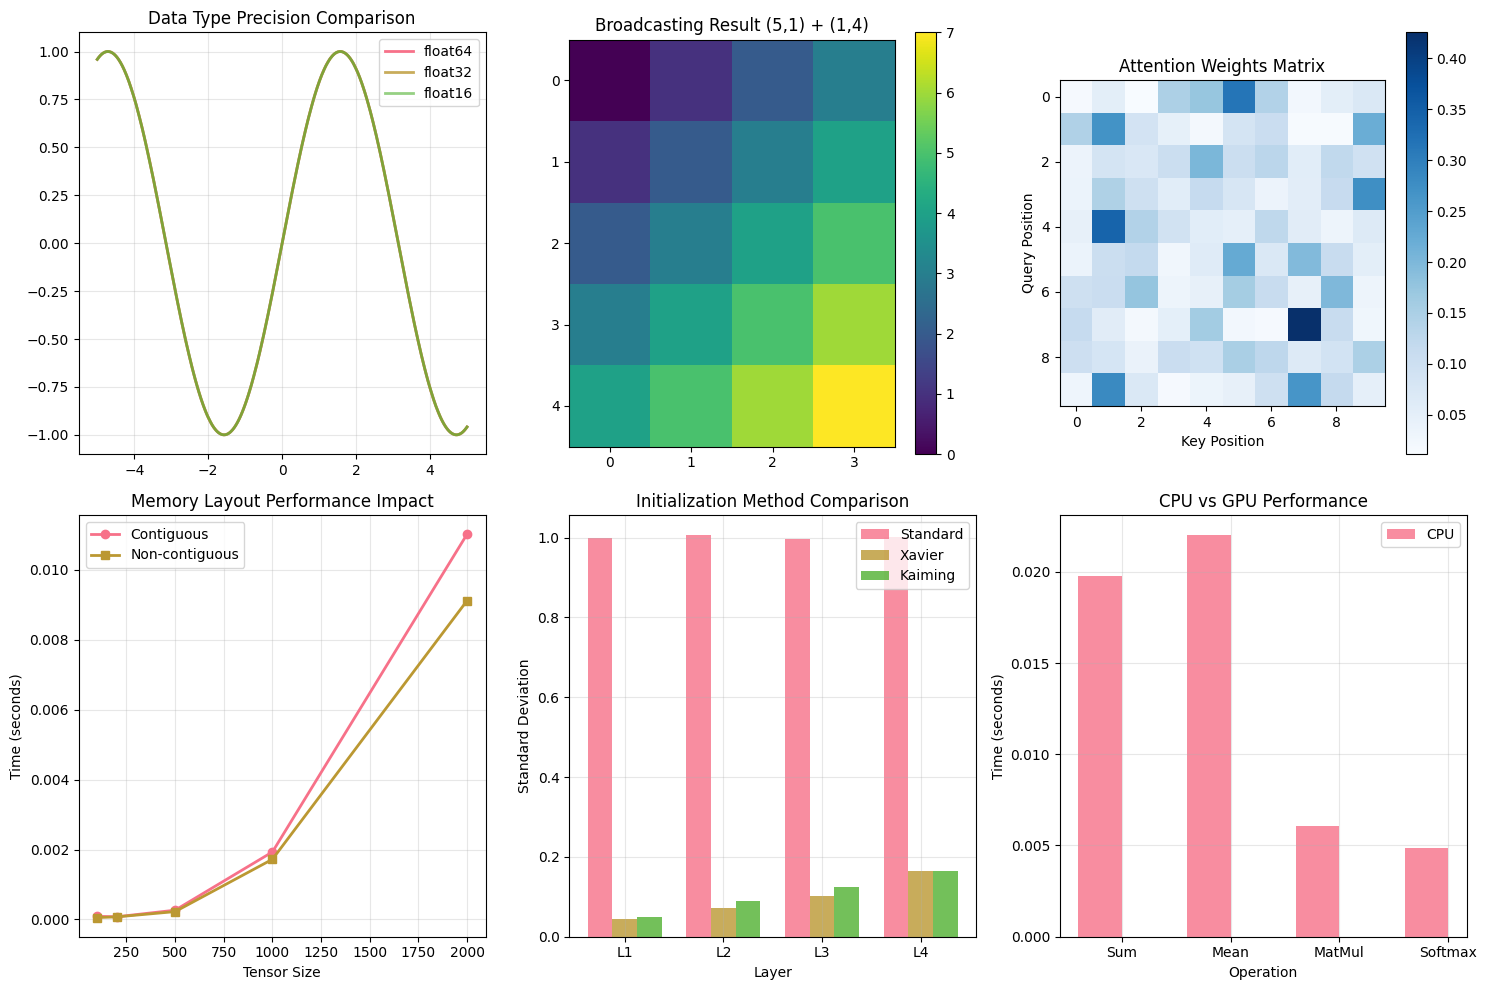

Comprehensive tensor visualization complete!


In [34]:
print("=== Advanced Tensor Visualization ===")

# Create comprehensive visualization of tensor operations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Data type precision comparison
x = torch.linspace(-5, 5, 1000)
y_float64 = torch.sin(x).to(torch.float64)
y_float32 = torch.sin(x).to(torch.float32)
y_float16 = torch.sin(x).to(torch.float16)

axes[0, 0].plot(x.numpy(), y_float64.numpy(), label='float64', linewidth=2)
axes[0, 0].plot(x.numpy(), y_float32.numpy(), label='float32', linewidth=2, alpha=0.8)
axes[0, 0].plot(x.numpy(), y_float16.numpy(), label='float16', linewidth=2, alpha=0.6)
axes[0, 0].set_title('Data Type Precision Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Broadcasting visualization
a = torch.arange(5).unsqueeze(1)  # (5, 1)
b = torch.arange(4).unsqueeze(0)  # (1, 4)
c = a + b  # Broadcasting result (5, 4)

im = axes[0, 1].imshow(c.numpy(), cmap='viridis')
axes[0, 1].set_title('Broadcasting Result (5,1) + (1,4)')
plt.colorbar(im, ax=axes[0, 1])

# 3. Attention weights visualization
seq_len = 10
attention_weights = torch.softmax(torch.randn(seq_len, seq_len), dim=-1)
im = axes[0, 2].imshow(attention_weights.numpy(), cmap='Blues')
axes[0, 2].set_title('Attention Weights Matrix')
axes[0, 2].set_xlabel('Key Position')
axes[0, 2].set_ylabel('Query Position')
plt.colorbar(im, ax=axes[0, 2])

# 4. Memory layout impact
sizes = [100, 200, 500, 1000, 2000]
contiguous_times = []
non_contiguous_times = []

for size in sizes:
    tensor = torch.randn(size, size)
    transposed = tensor.t()

    # Time contiguous
    start = time.time()
    for _ in range(10):
        _ = tensor.sum()
    contiguous_times.append(time.time() - start)

    # Time non-contiguous
    start = time.time()
    for _ in range(10):
        _ = transposed.sum()
    non_contiguous_times.append(time.time() - start)

axes[1, 0].plot(sizes, contiguous_times, 'o-', label='Contiguous', linewidth=2)
axes[1, 0].plot(sizes, non_contiguous_times, 's-', label='Non-contiguous', linewidth=2)
axes[1, 0].set_xlabel('Tensor Size')
axes[1, 0].set_ylabel('Time (seconds)')
axes[1, 0].set_title('Memory Layout Performance Impact')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Initialization method comparison
methods = ['Standard', 'Xavier', 'Kaiming']
layer_sizes = [(784, 256), (256, 128), (128, 64), (64, 10)]

std_stds = []
xavier_stds = []
kaiming_stds = []

for in_feat, out_feat in layer_sizes:
    # Standard
    std_W = torch.randn(out_feat, in_feat)
    std_stds.append(std_W.std().item())

    # Xavier
    xavier_W = torch.randn(out_feat, in_feat) * ((2.0 / (in_feat + out_feat)) ** 0.5)
    xavier_stds.append(xavier_W.std().item())

    # Kaiming
    kaiming_W = torch.randn(out_feat, in_feat) * ((2.0 / in_feat) ** 0.5)
    kaiming_stds.append(kaiming_W.std().item())

x_pos = range(len(layer_sizes))
width = 0.25

axes[1, 1].bar([x - width for x in x_pos], std_stds, width, label='Standard', alpha=0.8)
axes[1, 1].bar(x_pos, xavier_stds, width, label='Xavier', alpha=0.8)
axes[1, 1].bar([x + width for x in x_pos], kaiming_stds, width, label='Kaiming', alpha=0.8)

axes[1, 1].set_xlabel('Layer')
axes[1, 1].set_ylabel('Standard Deviation')
axes[1, 1].set_title('Initialization Method Comparison')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels([f'L{i+1}' for i in range(len(layer_sizes))])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Tensor operation performance comparison
operations = ['Sum', 'Mean', 'MatMul', 'Softmax']
cpu_times = []
gpu_times = []

test_tensor = torch.randn(1000, 1000)

# CPU times
for op in operations:
    start = time.time()
    if op == 'Sum':
        for _ in range(100): _ = test_tensor.sum()
    elif op == 'Mean':
        for _ in range(100): _ = test_tensor.mean()
    elif op == 'MatMul':
        for _ in range(100): _ = torch.mm(test_tensor[:100, :100], test_tensor[:100, :100])
    elif op == 'Softmax':
        for _ in range(100): _ = torch.softmax(test_tensor[:100, :100], dim=-1)
    cpu_times.append(time.time() - start)

# GPU times (if available)
if torch.cuda.is_available():
    test_tensor_gpu = test_tensor.to('cuda')
    for op in operations:
        torch.cuda.synchronize()
        start = time.time()
        if op == 'Sum':
            for _ in range(100): _ = test_tensor_gpu.sum()
        elif op == 'Mean':
            for _ in range(100): _ = test_tensor_gpu.mean()
        elif op == 'MatMul':
            for _ in range(100): _ = torch.mm(test_tensor_gpu[:100, :100], test_tensor_gpu[:100, :100])
        elif op == 'Softmax':
            for _ in range(100): _ = torch.softmax(test_tensor_gpu[:100, :100], dim=-1)
        torch.cuda.synchronize()
        gpu_times.append(time.time() - start)
else:
    gpu_times = [0] * len(operations)

x_pos = range(len(operations))
axes[1, 2].bar([x - 0.2 for x in x_pos], cpu_times, 0.4, label='CPU', alpha=0.8)
if torch.cuda.is_available():
    axes[1, 2].bar([x + 0.2 for x in x_pos], gpu_times, 0.4, label='GPU', alpha=0.8)

axes[1, 2].set_xlabel('Operation')
axes[1, 2].set_ylabel('Time (seconds)')
axes[1, 2].set_title('CPU vs GPU Performance')
axes[1, 2].set_xticks(x_pos)
axes[1, 2].set_xticklabels(operations)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Comprehensive tensor visualization complete!")

## 8. Summary and Best Practices

### Key Concepts Mastered

In this comprehensive notebook, we have covered:

1. **Advanced Tensor Creation**:
   - `torch.tensor()` with memory sharing analysis
   - `torch.zeros()` for neural network applications
   - `torch.randn()` with advanced initialization techniques
   - `torch.arange()` for position embeddings and coordinate grids

2. **Tensor Properties and Memory Management**:
   - Comprehensive shape and broadcasting analysis
   - Memory layout, strides, and performance implications
   - Data type precision and type promotion
   - Advanced device management and transfer optimization

3. **Advanced Tensor Manipulation**:
   - Memory-efficient reshaping with `view()` vs `reshape()`
   - Dimension manipulation for broadcasting
   - Complex permutations for neural network architectures
   - Real-world examples from Transformer models

4. **Advanced Indexing and Slicing**:
   - Boolean indexing and masking for attention mechanisms
   - Tensor indexing with gather/scatter operations
   - Variable-length sequence processing
   - Conditional operations and advanced selection

5. **Performance Optimization**:
   - Memory access pattern analysis
   - Vectorization vs loop performance
   - Broadcasting efficiency optimization
   - PyTorch compilation techniques

6. **Real-World Applications**:
   - Character-level language model implementation
   - Attention mechanism with masking
   - Multi-head attention reshaping
   - Efficient batch processing techniques

### Best Practices Learned

1. **Memory Efficiency**:
   - Use `torch.from_numpy()` when memory sharing is desired
   - Prefer in-place operations (`+=`, `*=`) when possible
   - Understand contiguity for optimal performance
   - Use appropriate data types to balance precision and memory

2. **Performance Optimization**:
   - Always use vectorized operations instead of loops
   - Leverage broadcasting to avoid explicit tensor expansion
   - Use `torch.compile()` for performance-critical operations
   - Consider memory access patterns for cache efficiency

3. **Neural Network Design**:
   - Use proper initialization schemes (Xavier, Kaiming)
   - Understand dimension manipulation for multi-head attention
   - Apply efficient masking techniques for sequence processing
   - Optimize batch processing for memory efficiency

4. **Debugging and Analysis**:
   - Monitor tensor shapes throughout operations
   - Understand broadcasting rules to avoid shape errors
   - Use memory profiling for large-scale applications
   - Validate numerical stability across data types

### Next Steps

- **Practice**: Implement the examples with your own data
- **Experiment**: Try different initialization schemes and measure their impact
- **Optimize**: Apply performance techniques to your existing code
- **Build**: Create more complex neural network architectures
- **Move Forward**: Progress to automatic differentiation and gradient computation

This comprehensive foundation in tensor operations will serve as the basis for all advanced PyTorch development!